In [35]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning
from sklearn.svm import SVC



In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets


In [37]:

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [38]:
X.info();   print("----------------"*3)   ; y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dt

In [39]:
X.describe(),   print("----------------"*3)   , y.describe()

------------------------------------------------


(       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
 count    6497.000000       6497.000000  6497.000000     6497.000000   
 mean        7.215307          0.339666     0.318633        5.443235   
 std         1.296434          0.164636     0.145318        4.757804   
 min         3.800000          0.080000     0.000000        0.600000   
 25%         6.400000          0.230000     0.250000        1.800000   
 50%         7.000000          0.290000     0.310000        3.000000   
 75%         7.700000          0.400000     0.390000        8.100000   
 max        15.900000          1.580000     1.660000       65.800000   
 
          chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
 count  6497.000000          6497.000000           6497.000000  6497.000000   
 mean      0.056034            30.525319            115.744574     0.994697   
 std       0.035034            17.749400             56.521855     0.002999   
 min       0.009000             1.

In [19]:

# Visualize data distribution for each feature
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Pairplot to visualize relationships between features
sns.pairplot(X)
plt.show()

# Boxplots to identify outliers
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y['quality'])
plt.title('Distribution of Wine Quality')
plt.show()


# Relationship between features and target variable
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=col, data=pd.concat([X, y], axis=1))
    plt.title(f'Relationship between {col} and Wine Quality')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

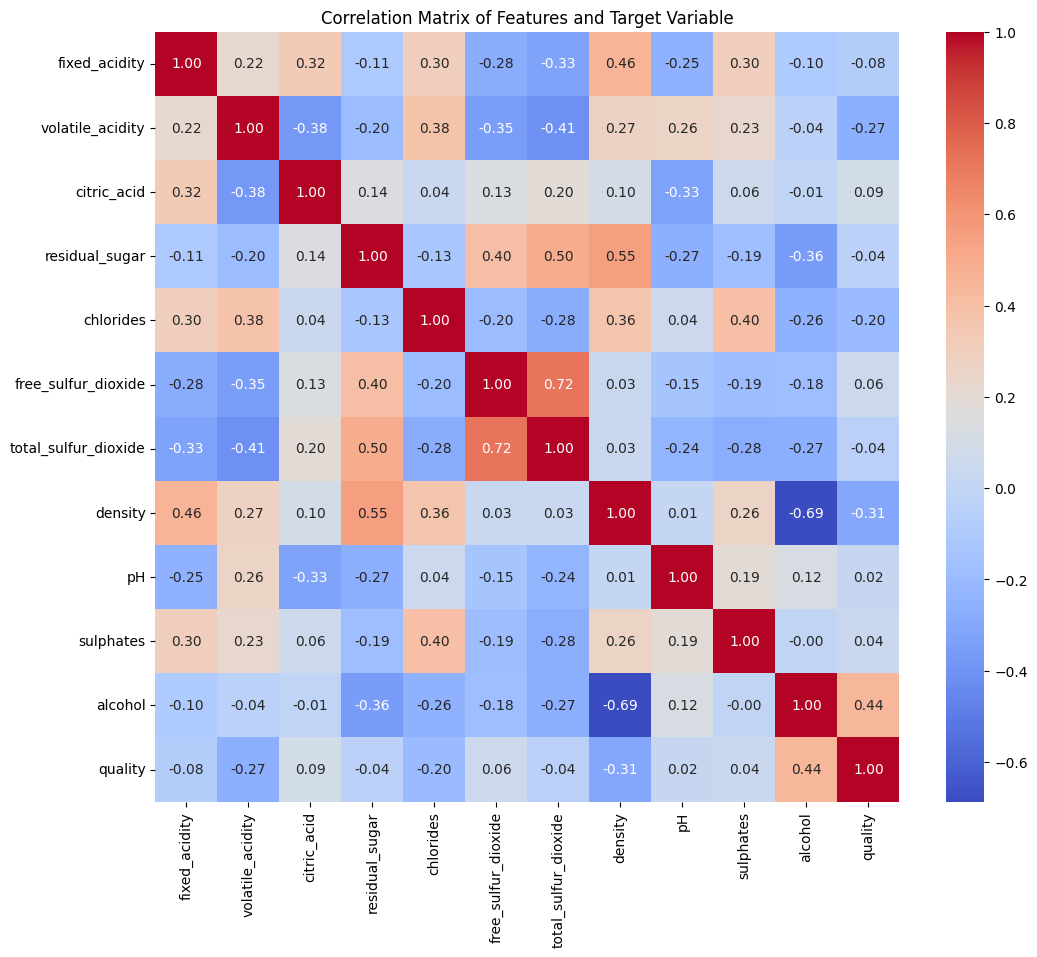

In [40]:

# Calculate the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

In [41]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=X.columns)

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [42]:

from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)  # Set a random state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y['quality'])

# Example of converting back to a DataFrame (optional):
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['quality'])

# Print the class distribution after oversampling
print(y_resampled['quality'].value_counts())

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Training Score: 0.7485045022353756
Testing Score: 0.722488038277512
Accuracy Score: 0.722488038277512
Precision Score: 0.7068702183212249
Recall Score: 0.722488038277512
F1 Score: 0.709327113707815


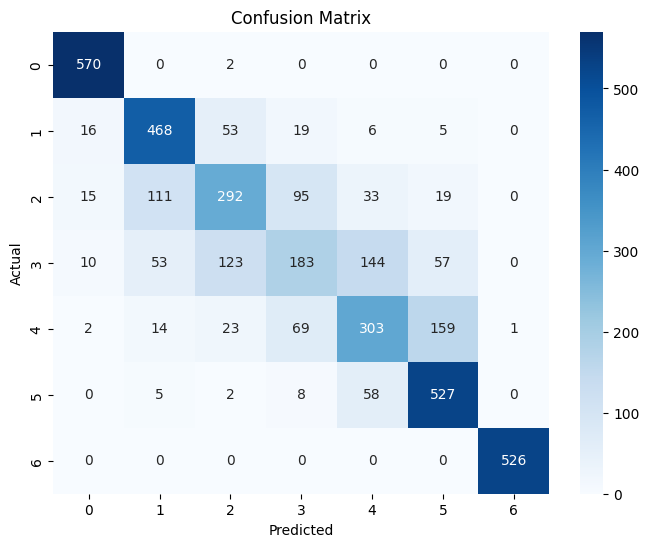

              precision    recall  f1-score   support

           3       0.93      1.00      0.96       572
           4       0.72      0.83      0.77       567
           5       0.59      0.52      0.55       565
           6       0.49      0.32      0.39       570
           7       0.56      0.53      0.54       571
           8       0.69      0.88      0.77       600
           9       1.00      1.00      1.00       526

    accuracy                           0.72      3971
   macro avg       0.71      0.72      0.71      3971
weighted avg       0.71      0.72      0.71      3971



In [45]:
# prompt: train svc algorithm and show evaluation matrix  , plot confusion matrix and classification report

# Initialize the SVC classifier
svc = SVC()

svc.fit(X_train, y_train)

print(f"Training Score: {svc.score(X_train, y_train)}")
print(f"Testing Score: {svc.score(X_test, y_test)}")

# Predict on the test set using the best model
predictions = svc.predict(X_test)

# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test,predictions)}")
print(f"Precision Score: {precision_score(y_test,predictions,average='weighted')}")
print(f"Recall Score: {recall_score(y_test,predictions,average='weighted')}")
print(f"F1 Score: {f1_score(y_test,predictions,average='weighted')}")

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, predictions))